In [20]:
import sys, os
from datetime import datetime
sys.path.append(os.path.abspath('./lib'))
import pandas as pd
import numpy as np
import importlib
import Environment as env_mod
import truck as truck_mod
import DataArrangement as data_mod

# simulator class
importlib.reload(env_mod)
SimulationConfig = env_mod.SimulationConfig
Simulator = env_mod.Simulator


# truck class
importlib.reload(truck_mod)  # ← ここでファイルの変更を反映
Truck = truck_mod.Truck      # 以後はこの Truck を使う
create_fleet = truck_mod.create_fleet

# data arrangement class
importlib.reload(data_mod)
DataArrange = data_mod.DataArrange

In [21]:
# Simulator Configuration
cfg = SimulationConfig(
    start_time = datetime(2025, 1, 1),
    total_time = 365,
    delta_time = 1
)

# Simulator
sim = Simulator(config=cfg, n_trucks=10)
events = sim.run()
# print(events)

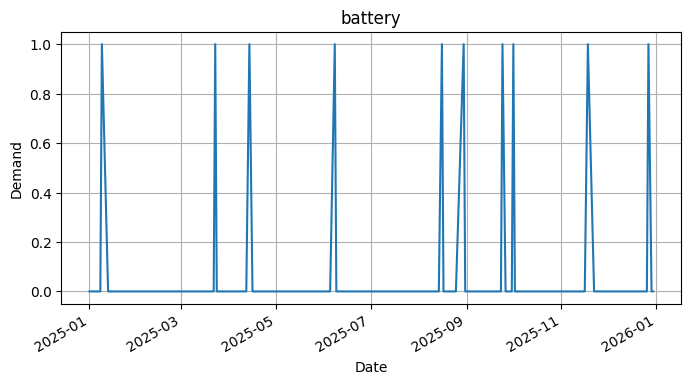

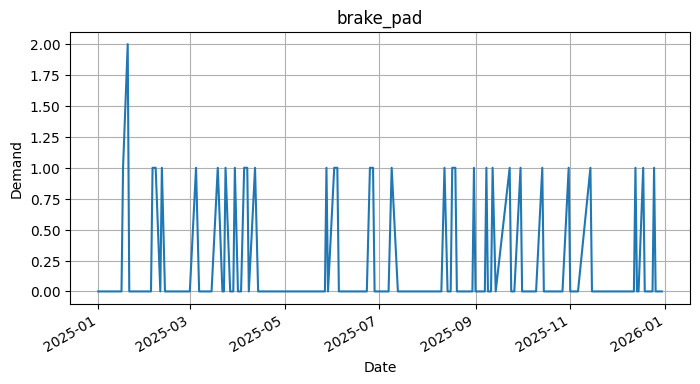

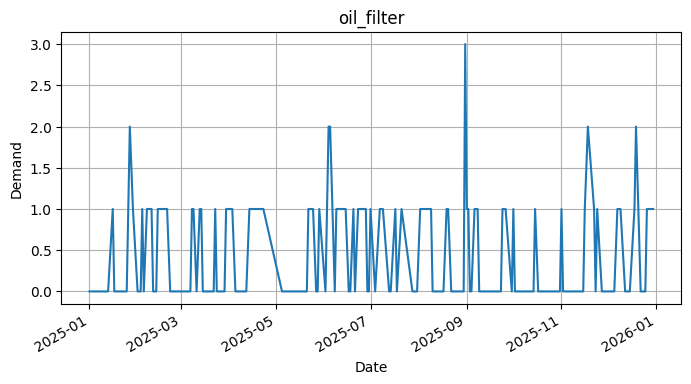

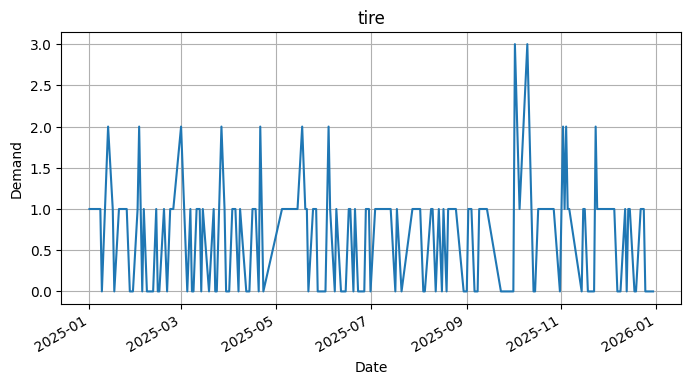

In [22]:
import matplotlib.pyplot as plt

# Data Arrangement
data_arrange = DataArrange(events=events, start_time=cfg.start_time)

# each part data
for col in data_arrange.part_data.columns:
    data_arrange.part_data[col].plot(figsize=(8,4), title=col)
    plt.xlabel("Date")
    plt.ylabel("Demand")
    plt.grid(True)
    plt.show()



